<a href="https://colab.research.google.com/github/ttrung14/Dogs-and-Cats-Classification/blob/main/dog_and_cat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip

--2022-11-05 04:00:48--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.36.252.210, 2600:1413:b000:78a::317f, 2600:1413:b000:793::317f
Connecting to download.microsoft.com (download.microsoft.com)|23.36.252.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: ‘kagglecatsanddogs_5340.zip’

kagglecatsanddogs_5 100%[===================>] 786.67M  94.2MB/s    in 8.0s    

2022-11-05 04:00:56 (98.9 MB/s) - ‘kagglecatsanddogs_5340.zip’ saved [824887076/824887076]



In [2]:
!unzip kagglecatsanddogs_5340.zip

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
  inflating: PetImages/Dog/5500.jpg  
  inflating: PetImages/Dog/5501.jpg  
  inflating: PetImages/Dog/5502.jpg  
  inflating: PetImages/Dog/5503.jpg  
  inflating: PetImages/Dog/5504.jpg  
  inflating: PetImages/Dog/5505.jpg  
  inflating: PetImages/Dog/5506.jpg  
  inflating: PetImages/Dog/5507.jpg  
  inflating: PetImages/Dog/5508.jpg  
  inflating: PetImages/Dog/5509.jpg  
  inflating: PetImages/Dog/551.jpg   
  inflating: PetImages/Dog/5510.jpg  
  inflating: PetImages/Dog/5511.jpg  
  inflating: PetImages/Dog/5512.jpg  
  inflating: PetImages/Dog/5513.jpg  
  inflating: PetImages/Dog/5514.jpg  
  inflating: PetImages/Dog/5515.jpg  
  inflating: PetImages/Dog/5516.jpg  
  inflating: PetImages/Dog/5517.jpg  
  inflating: PetImages/Dog/5518.jpg  
  inflating: PetImages/Dog/5519.jpg  
  inflating: PetImages/Dog/552.jpg   
  inflating: PetImages/Dog/5520.jpg  
  inflating: PetImages/Dog/5521.jpg  
  inflating: PetImages/Dog/5522

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
#matplotlib.use('Agg')
import warnings
import os
import cv2
import PIL
import tqdm
import random

from tensorflow.keras.utils import load_img
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
warnings.filterwarnings('ignore')

In [4]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Sat Nov  5 04:02:09 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [5]:
input_path = []
label = []

for class_name in os.listdir("PetImages"):
    for path in os.listdir("PetImages/"+class_name):
        if class_name == 'Cat':
            label.append(0)
        else:
            label.append(1)
        input_path.append(os.path.join("PetImages", class_name, path))
print(input_path[0], label[0])

PetImages/Cat/890.jpg 0


In [6]:
df = pd.DataFrame()
df['images'] = input_path
df['label'] = label
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,images,label
0,PetImages/Cat/8718.jpg,0
1,PetImages/Cat/1000.jpg,0
2,PetImages/Dog/8262.jpg,1
3,PetImages/Dog/4698.jpg,1
4,PetImages/Cat/3322.jpg,0


In [7]:
l = []
for image in df['images']:
    try:
        img = PIL.Image.open(image)
    except:
        l.append(image)
print(l)

['PetImages/Cat/666.jpg', 'PetImages/Dog/11702.jpg', 'PetImages/Cat/Thumbs.db', 'PetImages/Dog/Thumbs.db']


In [8]:
# delete db files
df = df[df['images']!='PetImages/Dog/Thumbs.db']
df = df[df['images']!='PetImages/Cat/Thumbs.db']
df = df[df['images']!='PetImages/Cat/666.jpg']
df = df[df['images']!='PetImages/Dog/11702.jpg']
print(len(df))

24998


In [17]:
df['label'] = df['label'].astype('str')
df.head()

,images,label
0,PetImages/Cat/8718.jpg,0
1,PetImages/Cat/1000.jpg,0
2,PetImages/Dog/8262.jpg,1
3,PetImages/Dog/4698.jpg,1
4,PetImages/Cat/3322.jpg,0


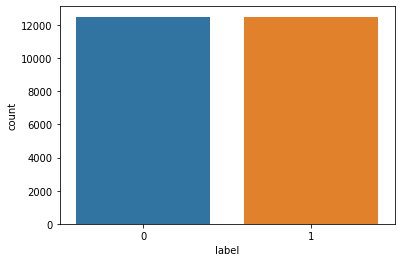

In [18]:
sns.countplot(df['label'])

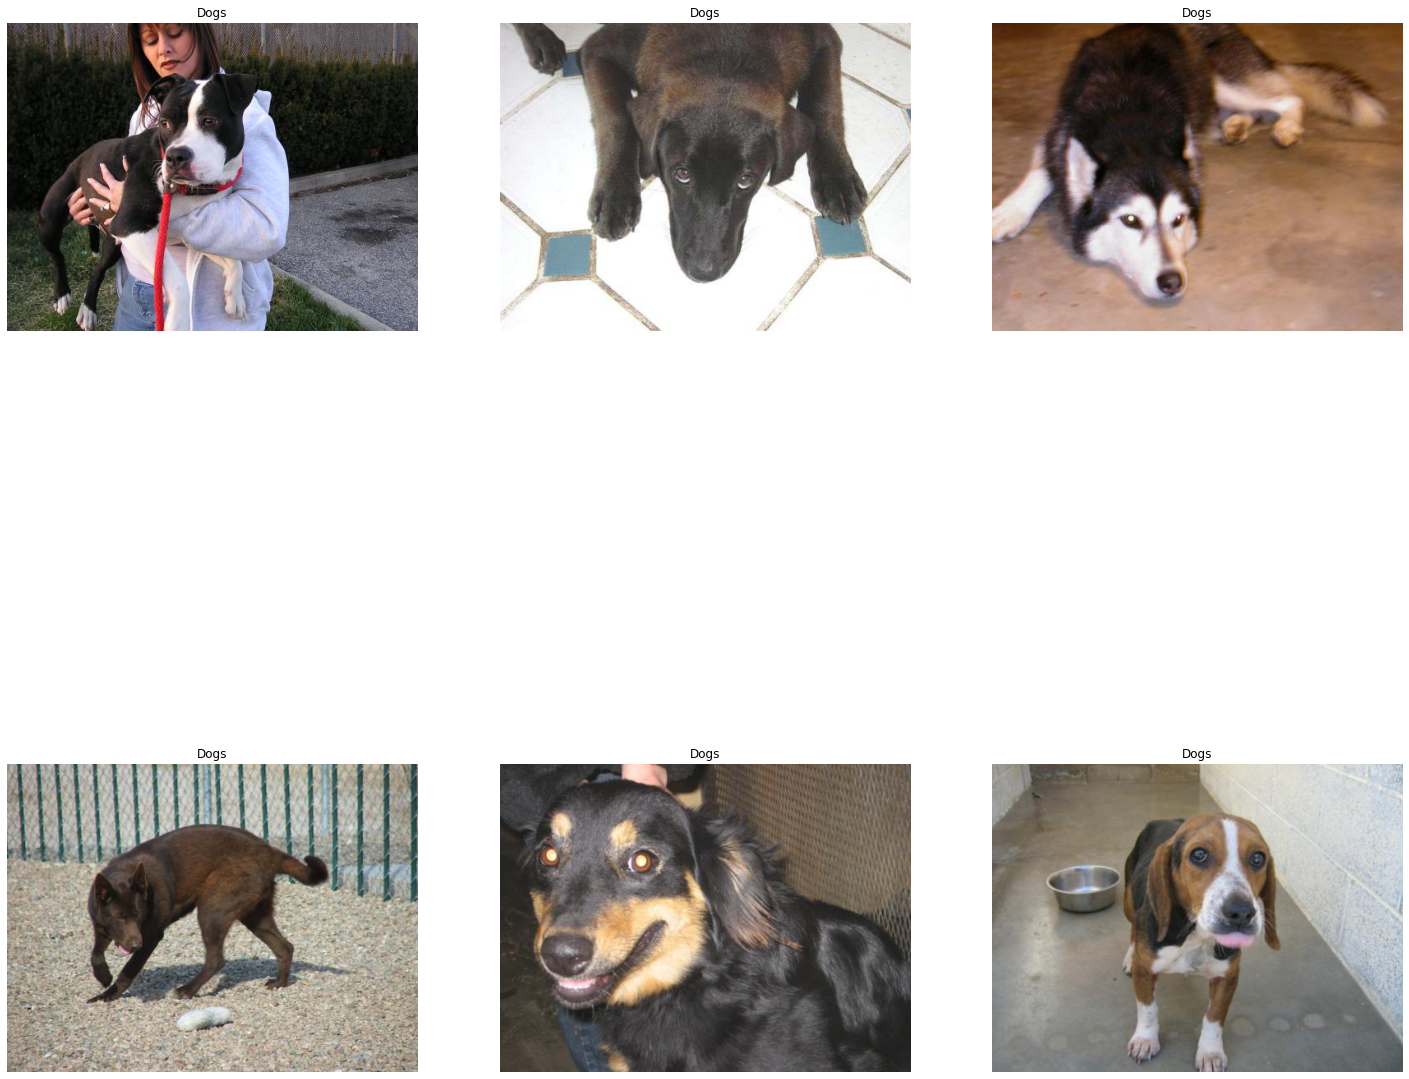

In [9]:
# to display grid of images
plt.figure(figsize=(2,3))
temp = df[df['label']==1]['images']
start = random.randint(0, len(temp))
files = temp[start:start+6]

for index, file in enumerate(files):
    plt.subplot(2,3, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title('Dogs')
    plt.axis('off')

In [19]:
train_data, test_data = train_test_split(df, test_size=0.2,random_state=1)
print(len(train_data),len(test_data))

19998 5000


In [20]:
train_generator = ImageDataGenerator(rescale = 1./255,
                                     rotation_range = 40,
                                     shear_range = 0.2,
                                     zoom_range = 0.2,
                                     horizontal_flip = True,
                                     fill_mode = 'nearest')
val_generator = ImageDataGenerator(rescale = 1./255)

train_iterator = train_generator.flow_from_dataframe(train_data,
                                                       x_col = 'images',
                                                       y_col = 'label',
                                                       target_size = (128,128),
                                                       batch_size = 512,
                                                       class_mode = 'binary')
val_itarator = val_generator.flow_from_dataframe(test_data,
                                                  x_col = 'images',
                                                  y_col = 'label',
                                                  target_size = (128,128),
                                                  batch_size = 512,
                                                  class_mode = 'binary')
 

Found 19998 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


In [27]:
model = Sequential()

model.add(Conv2D(16,(3,3),activation='relu',input_shape=(128,128,3)))
model.add(MaxPool2D(2,2))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 63, 63, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 64)      

In [28]:
H = model.fit(train_iterator,epochs=25,validation_data=val_itarator)

Epoch 1/25
40/40 [==============================] - 130s 3s/step - loss: 0.7050 - accuracy: 0.5487 - val_loss: 0.6542 - val_accuracy: 0.6102
Epoch 2/25
40/40 [==============================] - 125s 3s/step - loss: 0.6187 - accuracy: 0.6612 - val_loss: 0.5882 - val_accuracy: 0.6874
Epoch 3/25
40/40 [==============================] - 125s 3s/step - loss: 0.5625 - accuracy: 0.7093 - val_loss: 0.5468 - val_accuracy: 0.7154
Epoch 4/25
40/40 [==============================] - 122s 3s/step - loss: 0.5300 - accuracy: 0.7331 - val_loss: 0.5008 - val_accuracy: 0.7548
Epoch 5/25
40/40 [==============================] - 124s 3s/step - loss: 0.5097 - accuracy: 0.7505 - val_loss: 0.5073 - val_accuracy: 0.7544
Epoch 6/25
40/40 [==============================] - 122s 3s/step - loss: 0.5084 - accuracy: 0.7462 - val_loss: 0.4883 - val_accuracy: 0.7656
Epoch 7/25
40/40 [==============================] - 124s 3s/step - loss: 0.4878 - accuracy: 0.7603 - val_loss: 0.4516 - val_accuracy: 0.7850
Epoch 8/25
40

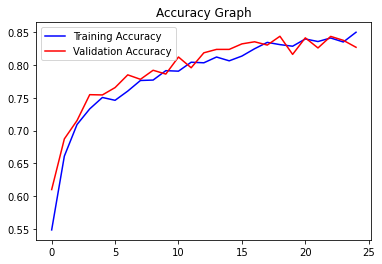

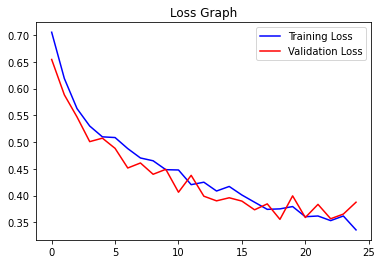

In [29]:
acc = H.history['accuracy']
val_acc = H.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = H.history['loss']
val_loss = H.history['val_loss']
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
#plt.show()

In [34]:
import tensorflow as tf
import glob
checkpoint_path = "training/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
model.save_weights(checkpoint_path.format(epoch=0))

In [35]:
#os.listdir(checkpoint_dir)
latest = tf.train.latest_checkpoint(checkpoint_dir)
latest

'training/cp-0000.ckpt'

In [ ]:
IMAGE_SIZE = 200

# Preprocess an image
def preprocess_image(image):
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [IMAGE_SIZE, IMAGE_SIZE])
    image /= 255.0  # normalize to [0,1] range
    return image

# Read the image from path and preprocess
def load_and_preprocess_image(path):
    image = tf.io.read_file(path)
    return preprocess_image(image)

images_paths = glob.glob("/usr/local/share_storages/data/dataset/dogs-vs-cats/test1/*.jpg")

rows = 3
plt.figure(figsize=(10,7))
for num, x in enumerate(images_paths[0:9]):
    image = load_and_preprocess_image(x)
    pred = model.predict(np.array([image]))
    if pred[0] > 0.5: class_name = 'Dog nè'
    else: class_name = 'Cat nè'
    plt.subplot(rows,3, num+1)
    plt.title(class_name)
    plt.axis('off')
    plt.imshow(image)
plt.show()
